In [175]:
import matplotlib.pyplot as plt
import numpy as np

In [176]:
import copy
from sklearn.decomposition import PCA

In [177]:
import networkx as nx


In [178]:
episode = np.zeros([1,5,28,28,2])
episode[0][0][:,:,0] = np.loadtxt("episode_0.csv")
episode[0][0][:,:,1] = np.loadtxt("episode_0.csv")

episode[0][1][:,:,0] = np.loadtxt("episode_1.csv")
episode[0][1][:,:,1] = np.loadtxt("episode_1.csv")

episode[0][2][:,:,0] = np.loadtxt("episode_2.csv")
episode[0][2][:,:,1] = np.loadtxt("episode_2.csv")

episode[0][3][:,:,0] = np.loadtxt("episode_3.csv")
episode[0][3][:,:,1] = np.loadtxt("episode_3.csv")

episode[0][4][:,:,0] = np.loadtxt("episode_4.csv")
episode[0][4][:,:,1] = np.loadtxt("episode_4.csv")


In [179]:
class sentive_pckd_ratio_nrn(object):
    """neurone Ratio du modèle de réseau Sentive AI

    Args:
        object (int): numéro donné à l'identifiant du neurone
    """
    def __init__(self, number):
        self.number = number
        self.neuron = {
            "_id":number,
            "schema_version":1,
            "type": "sentive_vision_packed_ratio",
            "DbConnectivity":{
                "pre_synaptique":[],
                "post_synaptique":[]
            },
            "meta":{
                "total_length" : 0,
                "tips" : [],
                "nodes" : [],
                "order" : {},
            }
        }


In [180]:
class sentive_vision_neuron(object):
    """
        prototype de données des objets neurones vision segment arcs
        Cette classe ne contient aucune fonction mais ne sert qu'à conserver les données
        Les fonctions sont dans une autre classe.
    """
    def __init__(self, number):
        self.number = number
        self.neuron = {
            "_id":number,
            "schema_version":2,
            "type": "sentive_vision_arcs",
            "DbConnectivity":{
                "pre_synaptique":[],
                "post_synaptique":[]
            },
            "meta":{
                "mode": "croissance",
                "center":{
                    "x":0,
                    "y":0
                },
                "real_center":{
                    "x":0.0,
                    "y":0.0
                },
                "matrix_width":1,
                "local_tip_1":{
                    "x":0,
                    "y":0
                },
                "vector_1":{
                    "x":0,
                    "y":0
                },
                "local_tip_2":{
                    "x":0,
                    "y":0
                },
                "vector_2":{
                    "x":0,
                    "y":0
                },
                "axes_symétrie":[],
                "angle":-999,
                "std_angle":-1,
                "length_c":0
            }
        }

    
class sentive_neuron_helper():
    def __init__(self):
        
        self.init_matrix = []
        self.init_matrix.append( np.array([[1, 0, -1],[1, 0, -1],[1, 0, -1]]))
        self.init_matrix.append( np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]]))
        self.init_matrix.append( np.array([[1, 1, 0],[1, 0, -1],[0, -1, -1]]))
        self.init_matrix.append( np.array([[0, -1, -1],[1, 0, -1],[1, 1, 0]]))


        self.dir_matrix =  np.array([[1, 1, 1],[1, 0, 1],[1, 1, 1]])


        self.ok_conf = []
        self.ok_conf.append( np.array([[1, 0, -1],[0, 1, 0],[0, 0, 0]]))
        self.ok_conf.append( np.array([[1, 0, 0],[0, 1, -1],[0, 0, 0]]))
        self.ok_conf.append( np.array([[1, 0, 0],[0, 1, 0],[0, 0, -1]]))
        
        self.ok_conf.append( np.array([[0, 0, -1],[1, 1, 0],[0, 0, 0]]))
        self.ok_conf.append( np.array([[0, 0, 0],[1, 1, -1],[0, 0, 0]]))
        self.ok_conf.append( np.array([[0, 0, 0],[1, 1, 0],[0, 0, -1]]))
        
        self.ok_conf.append( np.array([[0, 0, -1],[0, 1, 0],[1, 0, 0]]))
        self.ok_conf.append( np.array([[0, 0, 0],[0, 1, -1],[1, 0, 0]]))
        self.ok_conf.append( np.array([[0, 0, 0],[0, 1, 0],[1, 0, -1]]))
        
        self.ok_conf.append( np.array([[0, 0, 1],[0, 1, 0],[0, 0, -1]]))
        self.ok_conf.append( np.array([[0, 1, 0],[0, 1, 0],[0, 0, -1]]))
        
        self.ok_conf.append( np.array([[1, 0, 0],[0, 1, 0],[0, -1, 0]]))
        self.ok_conf.append( np.array([[0, 1, 0],[0, 1, 0],[0, -1, 0]]))
        
        self.ok_conf.append( np.array([[1, 0, 0],[0, 1, 0],[-1, 0, 0]]))
        self.ok_conf.append( np.array([[0, 1, 0],[0, 1, 0],[-1, 0, 0]]))
        
        
        self.lst_nrns = []
        self.id_nrn = 0 # id max des neurones
        self.nb_nrns = 0 # nb de neurones dans le tableau (sans avoir à utiliser la fonction len)
        
        # https://networkx.org/documentation/stable/tutorial.html
        self.netGraph = nx.Graph()
        
        
    def add_new_nrn(self, nrn_type=''):
        """Ajoute un nouveau neurone au pool (remplace la base de données MongoDB de Sentive AI en mode non cloud)

        Returns:
            [int]: [identifiant du nouveau neurone créé]
        """
        self.id_nrn += 1
        if nrn_type=='':
            self.lst_nrns.append(sentive_vision_neuron(self.id_nrn))
        else:
            self.lst_nrns.append(sentive_pckd_ratio_nrn(self.id_nrn))
        
        self.netGraph.add_node(self.id_nrn)

        self.nb_nrns = len(self.lst_nrns)
        return self.nb_nrns - 1
    
    def remove_nrn_pos(self, position):
        self.lst_nrns.pop(position)
        self.nb_nrns = len(self.lst_nrns)
        return self.nb_nrns - 1
        
        
    def FctIterMean(self, Nb_activations, NewAct, avgValue):
        """Calcule la Moyenne itérative

        Args:
            Nb_activations ([int]): [nb de valeur intégrée dans la moyenne précédente]
            NewAct ([float]): [Nouvelle valeur à intégrer à la moyenne]
            avgValue ([float]): [valeur moyenne précédemment calculée]

        Returns:
            [float]: [nouvelle moyenne]
        """
        Nb_activations = int(Nb_activations)
        NewAct = float(NewAct)
        avgValue = float(avgValue)
        return ((Nb_activations - 1) / Nb_activations
                * avgValue + NewAct / Nb_activations)
    
    
    def get_x_matrix(self, size):
        size = int(size)
        if size>=2:
            output = np.array([np.arange(size),np.arange(size)])
        else:
            return np.array(np.arange(size))
        for i in range(2,size):
            output = np.append(output,[np.arange(size)],axis=0)
        return output

    
    def get_y_matrix(self, size):
        size = int(size)
        if size>=2:
            output = np.array([np.ones(size)*0,np.ones(size)*1])
        else:
            return np.array(np.arange(size))
        for i in range(2,size):
            output = np.append(output,[np.ones(size)*i],axis=0)
        return output
    
    
    def get_matrix_center(self, size):
        """Retourne les coordonnées du centre de la matrice de taille "size"

        Args:
            size ([int]): [de prédérence une matrice carré de taille impaire]

        Returns:
            [int]: [coordonnées x et y du centre de la matrice carré impaire]
        """
        return np.floor(size/2)
    
    
    def get_receptive_field(self, local_neuron, current_vision):
        """
            {'center': {'x': 11, 'y': 7},
             'matrix_width': 3,
             'local_tip_1': {'x': 0, 'y': 1.0},
             'local_tip_2': {'x': 2.0, 'y': 0},
             'axes_symétrie': [0, 3]}
        """
        min_val_y = int(local_neuron["meta"]["center"]["y"] - np.floor(
                                                local_neuron["meta"]["matrix_width"]/2))
        max_val_y = int(local_neuron["meta"]["center"]["y"] + np.ceil(
                                                local_neuron["meta"]["matrix_width"]/2))
        min_val_x = int(local_neuron["meta"]["center"]["x"] - np.floor(
                                                local_neuron["meta"]["matrix_width"]/2))
        max_val_x = int(local_neuron["meta"]["center"]["x"] + np.ceil(
                                                local_neuron["meta"]["matrix_width"]/2))
        return current_vision[min_val_y:max_val_y, min_val_x:max_val_x, 0]
    

    def get_all_center_fields(self, list_neurons, current_vision):
        """
            Retourne l'image avec les centres des neurones surlignés
            Pour l'ensemble des neurones
        """
        nb = 0
        for sent_neuron in list_neurons:
            neuron = sent_neuron.neuron["meta"]
            current_vision[neuron["center"]["y"],neuron["center"]["x"]] = 5 #* current_vision[neuron["center"]["y"],neuron["center"]["x"]]
            nb += 1
        print(nb,"neurons")
        return current_vision
    
    
    def get_all_center_fields_width(self, list_neurons, current_vision, lint_width=5):
        """
            Retourne l'image avec les centres des neurones surlignés
            Il faut spécifier la couche des neurones sélectionnés
        """
        nb = 0
        for sent_neuron in list_neurons:
            neuron = sent_neuron.neuron["meta"]
            if neuron["matrix_width"] == lint_width:
                current_vision[neuron["center"]["y"],neuron["center"]["x"]] = 5 #* current_vision[neuron["center"]["y"],neuron["center"]["x"]]
                nb += 1
        print(nb,"neurons")
        return current_vision

    
    def get_neuron_receptive_field(self, nrn_id, current_vision, neurons_pool=-1, verbose=False):
        """Retourne le champs récepteur du neurone sur la matrice current_vision.

        Args:
            current_vision ([type]): [description]
            nrn_id ([type]): [description]
            neurons_pool (int, optional): [description]. Defaults to -1.
            verbose (bool, optional): [description]. Defaults to False.

        Returns:
            [matrice]: [matrice contenant la position du champs récepteur du neurone nrn_id]
        """

        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
            
        # récupère le neurone visé
        crnt_nrn = self.get_neuron_from_id(nrn_id, neurons_pool)
        # récupère la liste des 
        try:
            lst_nrn = crnt_nrn["meta"]["field_list"]
        except KeyError:
            lst_nrn = crnt_nrn["DbConnectivity"]["pre_synaptique"]
        
        # récupère le neurone pour chaque id de la liste
        nb = 0
        for sensor_id in lst_nrn:
            neuron = self.get_neuron_from_id(sensor_id, neurons_pool)
            current_vision[neuron["meta"]["center"]["y"],neuron["meta"]["center"]["x"]] = 5
            nb +=1
        if verbose:
            print(nb, "pixels")
            print(crnt_nrn)
        return current_vision
    
    
    def update_coord(self, previous):
        """
            lorsqu'on augmente la taille de la matrice de +2
            Toutes les coordonnées relatives à la taille précédente doivent être modifiées grace 
            à cette fonction.
        """
        previous["x"] += 1
        previous["y"] += 1
        return previous
    
    
    def rotate_vector(self, vector, angle_rotation):
        """Retourne les coordonnées du vector après rotation
        TODO: cette fonction n'est semble t'il jamais appelée

        Args:
            vector ([struct]): [structure contenant les coordonnées (x,y) d'un vecteur]
            angle_rotation ([float]): [exprimé en radian]

        Returns:
            [type]: [description]
        """
        output_vector = {
            "x":0,
            "y":0
        }
        output_vector["x"] = np.around(vector["x"] * np.cos(angle_rotation) - vector["y"] * np.sin(angle_rotation))
        output_vector["y"] = np.around(vector["x"] * np.sin(angle_rotation) + vector["y"] * np.cos(angle_rotation))
        return output_vector
    
    
    def anti_rotate_vector(self, vector, angle_rotation):
        output_vector = {
            "x":0,
            "y":0
        }
        output_vector["x"] = np.around(vector["x"] * np.cos(angle_rotation) + vector["y"] * np.sin(angle_rotation))
        output_vector["y"] = np.around(vector["y"] * np.cos(angle_rotation) - vector["x"] * np.sin(angle_rotation))
        return output_vector
    
    
    def get_pos_from_id(self, neuron_idx2, neurons_pool=-1):
        """
            retourne la position dans la tableau à partir du neuron_id
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        for neuron_idx in range(len(neurons_pool)):
            if neurons_pool[neuron_idx].neuron["_id"]==neuron_idx2:
                break
        return neuron_idx
    
    
    def get_neuron_from_id(self, neuron_idx2, neurons_pool=-1):
        """
            retourne le neurone à partir de son neuron_id "_id"
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        for neuron_idx in range(len(neurons_pool)):
            if neurons_pool[neuron_idx].neuron["_id"]==neuron_idx2:
                return neurons_pool[neuron_idx].neuron
    
    
    def get_avg_center(self, list_neuron_ids, neurons_pool=-1):
        """
            retourne la moyenne des centres à partir des neurones_id passés en paramètres
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
            
        list_x = []
        list_y = []

        output={
            "center":{
                "x":0,
                "y":0
            },
            "real_center":{
                "x":0,
                "y":0
            }
        }

        for int_id in list_neuron_ids:
            current_neuron = self.get_neuron_from_id(int_id, neurons_pool)
            list_x.append(current_neuron["meta"]["center"]["x"])
            list_y.append(current_neuron["meta"]["center"]["y"])

        output["real_center"]["y"]=np.mean(list_y)
        output["real_center"]["x"]=np.mean(list_x)

        output["center"]["x"]= int(np.round(output["real_center"]["x"]))
        output["center"]["y"] = int(np.round(output["real_center"]["y"]))
        return output

    
    def calc_angle(self, vector1, vector2):
        # calcul de l'angle de rotation entre les deux vecteurs passés en paramètres
        np_c_1 = np.array([vector1["x"], vector1["y"]])
        np_c_2 = np.array([vector2["x"], vector2["y"]])
        np_c_3 = np.array([-vector1["y"], vector1["x"]])
        signe = 1
        test = np.sum(np.multiply(np_c_3,np_c_2))
        if test < 0 :
            signe = -1
        return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))
    
    
    def calc_dist(self, point1, point2):
        """Calcule la distance entre deux points

        Args:
            point1 ([struct]): [description]
            point2 ([struct]): [description]

        Returns:
            [float]: [distance exprimé dans la même unités que les coordonnées des points passés en paramètres]
        """
        X_D = pow(point1["x"] - point2["x"],2)
        Y_D = pow(point1["y"] - point2["y"],2)
        return pow(X_D+Y_D,0.5)


    def get_gbl_orientO(self, nrn):
        hand_1 = nrn["meta"]["local_tip_1"]
        hand_2 = nrn["meta"]["local_tip_2"]
        v_outpt = {"x":0,"y":0}
        
        if hand_1["x"]< hand_2["x"]:
            v_outpt["x"] = hand_2["x"] - hand_1["x"]
            v_outpt["y"] = hand_2["y"] - hand_1["y"]
        elif hand_1["x"] > hand_2["x"]:
            v_outpt["x"] = hand_1["x"] - hand_2["x"]
            v_outpt["y"] = hand_1["y"] - hand_2["y"]
        elif hand_1["y"]< hand_2["y"]:
            v_outpt["x"] = hand_2["x"] - hand_1["x"]
            v_outpt["y"] = hand_2["y"] - hand_1["y"]
        elif hand_1["y"] > hand_2["y"]:
            v_outpt["x"] = hand_1["x"] - hand_2["x"]
            v_outpt["y"] = hand_1["y"] - hand_2["y"]
        return v_outpt

    
    def get_global_orientation(self, nrn_id, neurons_pool=-1):
        """Retourne le vecteur allant directement d'une extrémité à l'autre
        du champs récepteur du neurone
        Globalement orienté de gauche à droite et sinon de bas en haut.

        Args:
            nrn_id (int): identifiant du neurone
            neurons_pool (list, optional): base de données des neurones. Defaults to -1.

        Returns:
            struct: vecteyr donnant l'orientation générale
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns

        nrn = self.get_neuron_from_id(nrn_id, neurons_pool)

        return self.get_gbl_orientO(nrn)
        
    
    
    def raw_rotate_vector(self, vector, angle_rotation):
        """
        Retourne un angle après rotation
        Ne fait pas d'arrondi contrairement à l'autre fonction rotate_vector
        """
        output_vector = {
            "x":0,
            "y":0
        }
        output_vector["x"] = vector["x"] * np.cos(angle_rotation) - vector["y"] * np.sin(angle_rotation)
        output_vector["y"] = vector["x"] * np.sin(angle_rotation) + vector["y"] * np.cos(angle_rotation)
        return output_vector
    
    
    def nrn_drwr(self, mtrx, vector, angle, length, start):
        """
        Dessine un segment de courbe
        ============================
        En plus de la matrice dans laquelle il va dessiner, il ne prend que 4 paramètres.
        Le vecteur de départ, angle de rotation, la longueur (ou le nombre d'itérations).
        Et le point de départ.

        """
        mtrx[start["y"]][start["x"]] = 1
        new_pos = {"x": start["x"], "y": start["y"]}
        tmp_pos = {"x": start["x"], "y": start["y"]}
        tmp_pos["x"] = new_pos["x"]+vector["x"]
        new_pos["x"] = int(round(tmp_pos["x"]))
        tmp_pos["y"] = new_pos["y"]+vector["y"]
        new_pos["y"] = int(round(tmp_pos["y"]))
        mtrx[new_pos["y"]][new_pos["x"]] = 1
        angle = angle / 2

        for i in range(length-1):
            # rotate vector
            vector = self.raw_rotate_vector(vector, angle)
            tmp_pos["x"] = tmp_pos["x"]+vector["x"]
            new_pos["x"] = int(round(tmp_pos["x"]))
            tmp_pos["y"] = tmp_pos["y"]+vector["y"]
            new_pos["y"] = int(round(tmp_pos["y"]))
            mtrx[new_pos["y"]][new_pos["x"]] = 1

        return mtrx


    def get_list_presyn(self, lst_nrn, neurons_pool=-1):
        """retourne la liste des neurones pre_synaptique à partir d'une liste d'Identifiant et 

        Args:
            lst_nrn ([list de integer]): [id des neurones]
            neurons_pool ([list de sentive_vision_neurons]): [base de données des neurones dans laquelle chercher]

        Returns:
            [list d'integer]: [les id des neurones présynaptique pour tous les neurones passés en entrée]
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        lst_output = []
        for nrn_id in lst_nrn:
            lst_output.extend(self.get_neuron_from_id(nrn_id, neurons_pool)["DbConnectivity"]["pre_synaptique"])
        # lst_output = list(set(lst_output.sort()))
        return lst_output
    

    def intersect_presyn_field_list(self, nrn_id_1, nrn_id_2, neurons_pool=-1):
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        lst_nrn_1 = self.get_neuron_from_id(nrn_id_1, neurons_pool)["meta"]["field_list"]
        # print("lst_nrn_1",lst_nrn_1)
        list1 = self.get_list_presyn(lst_nrn_1, neurons_pool)
        lst_nrn_2 = self.get_neuron_from_id(nrn_id_2, neurons_pool)["meta"]["field_list"]
        list2 = self.get_list_presyn(lst_nrn_2, neurons_pool)
        return list(set(list1).intersection(list2))


    def calc_tips(self, neuron_id, neurons_pool=-1):
        """A partir de real_center calcule les distances avec chaque point de field list
        sélectionne les 2 neurones les plus éloignés du centre.
        Ce sont a priori les extrémités du segment.

        Args:
            neuron ([sentive_vision_neuron]): [description]

        Returns:
            [sentive_vision_neuron]: [modifié avec les bonnes informations des tips]
        """
        output = {
            "local_tip_1":{
                "x":0,
                "y":0
            },
            "vector_1":{
                "x":0,
                "y":0
            },
            "local_tip_2":{
                "x":0,
                "y":0
            },
            "vector_2":{
                "x":0,
                "y":0
            },
            "length_c":0
        }
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        
        neuron = self.get_neuron_from_id(neuron_id, neurons_pool)
        max_distance = 0.0
        tip_nrn_id = 0
        for nrn_id in neuron["meta"]["field_list"]:
            crnt_nrn = self.get_neuron_from_id(nrn_id, neurons_pool)
            # calcule la distance entre ce neurone et le centre
            crnt_dist = self.calc_dist(neuron["meta"]["real_center"],crnt_nrn["meta"]["center"])
            if crnt_dist>max_distance:
                max_distance = crnt_dist
                tip_nrn_id = nrn_id
        # calcule les données output
        crnt_nrn = self.get_neuron_from_id(tip_nrn_id, neurons_pool)
        output["local_tip_1"] = crnt_nrn["meta"]["center"]

        # vérifie si la distance avec le tip1 est plus éloigné
        lcl_tip1 = {
            "x":0,
            "y":0
        }
        lcl_tip1["x"] = output["local_tip_1"]["x"] + crnt_nrn["meta"]["vector_1"]["x"]
        lcl_tip1["y"] = output["local_tip_1"]["y"] + crnt_nrn["meta"]["vector_1"]["y"]
        crnt_dist = self.calc_dist(neuron["meta"]["real_center"],lcl_tip1)
        # si c'est le cas, utilise cette nouvelle distance
        if crnt_dist>max_distance:
            max_distance = crnt_dist
            output["local_tip_1"] = lcl_tip1
            output["vector_1"]["y"] = ( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
            output["vector_1"]["x"] = ( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2
        else:
            lcl_tip1["x"] = output["local_tip_1"]["x"] + crnt_nrn["meta"]["vector_2"]["x"]
            lcl_tip1["y"] = output["local_tip_1"]["y"] + crnt_nrn["meta"]["vector_2"]["y"]
            crnt_dist = self.calc_dist(neuron["meta"]["real_center"],lcl_tip1)
            # si c'est le cas, utilise cette nouvelle distance
            if crnt_dist>max_distance:
                max_distance = crnt_dist
                output["local_tip_1"] = lcl_tip1
                output["vector_1"]["y"] = -( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
                output["vector_1"]["x"] = -( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2
            
        for nrn_id in neuron["meta"]["field_list"]:
            crnt_nrn = self.get_neuron_from_id(nrn_id, neurons_pool)
            crnt_dist = self.calc_dist(output["local_tip_1"],crnt_nrn["meta"]["center"])
            if crnt_dist>max_distance:
                max_distance = crnt_dist
                tip_nrn_id = nrn_id
        # calcule les données output
        crnt_nrn = self.get_neuron_from_id(tip_nrn_id, neurons_pool)
        output["local_tip_2"] = crnt_nrn["meta"]["center"]
        output["vector_2"]["y"] = ( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
        output["vector_2"]["x"] = ( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2

        # vérifie si la distance avec le tip1 est plus éloigné
        lcl_tip2 = {
            "x":0,
            "y":0
        }
        lcl_tip2["x"] = output["local_tip_2"]["x"] + crnt_nrn["meta"]["vector_1"]["x"]
        lcl_tip2["y"] = output["local_tip_2"]["y"] + crnt_nrn["meta"]["vector_1"]["y"]
        crnt_dist = self.calc_dist(output["local_tip_1"],lcl_tip2)
        # si c'est le cas, utilise cette nouvelle distance
        if crnt_dist>max_distance:
            max_distance = crnt_dist
            output["local_tip_2"] = lcl_tip2
            output["vector_2"]["y"] = ( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
            output["vector_2"]["x"] = ( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2
        else:
            lcl_tip2["x"] = output["local_tip_2"]["x"] + crnt_nrn["meta"]["vector_2"]["x"]
            lcl_tip2["y"] = output["local_tip_2"]["y"] + crnt_nrn["meta"]["vector_2"]["y"]
            crnt_dist = self.calc_dist(output["local_tip_1"],lcl_tip2)
            # si c'est le cas, utilise cette nouvelle distance
            if crnt_dist>=max_distance:
                max_distance = crnt_dist
                output["local_tip_2"] = lcl_tip2
                output["vector_2"]["y"] = -( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
                output["vector_2"]["x"] = -( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2
        output["length_c"] = np.round((self.calc_dist(output["local_tip_1"],neuron["meta"]["real_center"])+self.calc_dist(output["local_tip_2"],neuron["meta"]["real_center"])))
        return output

    
    def calc_vector_length(self,vector):
        X_D = pow(vector["x"] ,2)
        Y_D = pow(vector["y"], 2)
        return pow(X_D+Y_D,0.5)


    def get_vector_scalar(self,vector_1, vector_2):
        l1 = self.calc_vector_length(vector_1)
        l2 = self.calc_vector_length(vector_2)
        return l1 * l2 * np.cos(self.calc_angle(vector_1,vector_2))

    

In [184]:
class sentive_network():

    def __init__(self, episode, epis_id=0):

        self.episd_id = epis_id

        self.episode = episode
        ###########################################
        # meta parameters
        self.SEUIL = 0.5

        self.IMG_SIZE = 28
        self.angle_tolerance_deg = 17
        self.ANGL_TOL = np.pi * self.angle_tolerance_deg / 180
        self.angle_tolerance_deg = 17
        self.ANGL_TOL2 = np.pi * self.angle_tolerance_deg / 180

        # si plus petit que EPSILON, considère que c'est égal
        self.ANGL_EPSILON = np.pi * 1 / 180
        
        # POURCENTAGE : MERGE_LIM = 75%
        self.MERGE_LIM = 90
        self.limite_merge = 1 - self.MERGE_LIM/100

        # self.MAX_ANGL = 0.75

        # POURCENTAGE DE PIXELS UNIQUE MINIMUM 
        self.MIN_PIXEL = 10

        # end metaparameters
        ###########################################

        # nb est le premier identifiant pour créer les neurones
        self.nb = 0
        # liste contenant tous les neurones : pool_vision
        # self.pool_vision = []
        self.nrnl_map = np.zeros([self.IMG_SIZE,self.IMG_SIZE])
        self.np_coord = []

        # fonctions utilitaires
        # neuron_tools 
        self.nrn_tls = sentive_neuron_helper()

        self.glbl_prm = {
            "cg":{"x":0,"y":0},
            "u_axis":{"x":0,"y":0},
            "v_axis":{"x":0,"y":0}
            }



    def layer_1(self):
        ##################################################
        ######## NEURONES DE LA COUCHE 1 (t_1) #########
        ##################################################
        # Crée un neurone par pixel au début:
        pxl_coord = []
        for y in range(1,self.IMG_SIZE-1):
            for x in range(1,self.IMG_SIZE-1):
                if self.episode[0][self.episd_id][y][x][0]>self.SEUIL:
                    nb  = self.nrn_tls.add_new_nrn()
                    
                    self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"] = x
                    self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"] = y
                    self.nrn_tls.lst_nrns[nb].neuron["meta"]["matrix_width"] = 1
                    self.nrnl_map[y][x] = nb

                    pxl_coord.append([x,y])
        print("nombre de neurones taille 1:",self.nrn_tls.nb_nrns)
        print("*"*40,"\n")

        pca = PCA(n_components=2)
        pca.fit(pxl_coord)
        # on obtient les résultats ici:
        print(pca.components_)
        self.glbl_prm["u_axis"]["x"]=pca.components_[0][0]
        self.glbl_prm["u_axis"]["y"]=pca.components_[0][1]
        self.glbl_prm["v_axis"]["x"]=pca.components_[1][0]
        self.glbl_prm["v_axis"]["y"]=pca.components_[1][1]

        self.np_coord = np.array(pxl_coord)
        self.glbl_prm["cg"]["x"] = np.mean(self.np_coord[:,0])
        self.glbl_prm["cg"]["y"] = np.mean(self.np_coord[:,1])

    
    def layer_2(self):
        ##################################################
        ########## NEURONES DE LA COUCHE 2 (t_3) #########
        ##################################################
        # Les neurones de cette couche ont des champs récepteurs 
        # qui sont des matrices de *3x3*
        # avec des mata paramètres les décrivants.

        for neuron_idx in range(self.nrn_tls.nb_nrns):
            # position du centre du neurone
            x = self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["center"]["x"]
            y = self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["center"]["y"]
            sub_matrix = episode[0][self.episd_id][y-1:y+2, x-1:x+2, 0]
            sub_matrix2 = self.nrnl_map[y-1:y+2, x-1:x+2]
            
            int_nb_conf = 0
            sum_angl = 0
            vector_1 = {"x":0,"y":0}
            vector_2 = {"x":0,"y":0}
            local_tip_1 = {"x":0,"y":0}
            local_tip_2 = {"x":0,"y":0}
            main_vector = {"x":0,"y":0}
            list_presyn = []
            for ok_idx in range(len(self.nrn_tls.ok_conf)):
                # s'il n'y a pas de pixels en dehors de l'axe de symétrie, y a rien à calculer.
                trois_mtrx = np.multiply(sub_matrix>self.SEUIL, self.nrn_tls.ok_conf[ok_idx])
                # trois_mtrx = np.multiply(sub_matrix2, self.nrn_tls.ok_conf[ok_idx])
                if np.sum(np.abs(trois_mtrx))==3:
                    int_nb_conf += 1
                    
                    ###########################
                    # Détermine les extrémités
                    # retire le pixel central
                    trois_mtrx = np.multiply(sub_matrix2, self.nrn_tls.ok_conf[ok_idx])
                    
                    list_presyn.extend(np.absolute(trois_mtrx).ravel())

                    trois_mtrx = np.multiply(sub_matrix, self.nrn_tls.ok_conf[ok_idx])
                    sub_result = np.multiply(trois_mtrx, self.nrn_tls.dir_matrix)
                    
                    #######
                    # d'un côté de l'axe (valeurs positives)
                    tmp_coord = np.trim_zeros(np.multiply(sub_result>0,self.nrn_tls.get_y_matrix(3)).ravel())
                    if len(tmp_coord)>0:
                        local_tip_1["y"] = np.mean(tmp_coord)
                    tmp_coord = np.trim_zeros(np.multiply(sub_result>0,self.nrn_tls.get_x_matrix(3)).ravel())
                    if len(tmp_coord)>0:
                        local_tip_1["x"] = np.mean(tmp_coord)
                    ##
                    # calcul des vecteurs directeurs
                    vector_1["y"] = self.nrn_tls.get_matrix_center(3) - local_tip_1["y"]
                    vector_1["x"] = self.nrn_tls.get_matrix_center(3) - local_tip_1["x"]
                    
                    #######
                    # les pixels de l'autre côté de l'axe les valeurs sont négatives
                    tmp_coord = np.trim_zeros(np.multiply(sub_result<0,self.nrn_tls.get_y_matrix(3)).ravel())
                    if len(tmp_coord)>0: 
                        local_tip_2["y"] = np.mean(tmp_coord)
                    tmp_coord = np.trim_zeros(np.multiply(sub_result<0,self.nrn_tls.get_x_matrix(3)).ravel())
                    if len(tmp_coord)>0:
                        local_tip_2["x"] = np.mean(tmp_coord)
                    ##
                    # calcul des vecteurs directeurs 
                    vector_2["y"] = local_tip_2["y"] - self.nrn_tls.get_matrix_center(3)
                    vector_2["x"] = local_tip_2["x"] - self.nrn_tls.get_matrix_center(3)
                    
                    #######
                    main_vector["x"] += vector_2["x"] + vector_1["x"]
                    main_vector["y"] += vector_2["y"] + vector_1["y"]
                    sum_angl += self.nrn_tls.calc_angle(vector_1, vector_2)

                    #######
            #####################################
            if int_nb_conf>0:
                # crée un nouveau neurone de taille 3
                nb  = self.nrn_tls.add_new_nrn()
                self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"] = x
                self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"] = y
                self.nrn_tls.lst_nrns[nb].neuron["meta"]["matrix_width"] = 3
                self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"].extend(set(np.array(list_presyn).astype(int)))

                for i in range(len(self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"])-1,-1,-1):
                    if self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"][i]==0:
                        self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"].pop(i)
                    else:
                        self.nrn_tls.netGraph.add_edge(self.nrn_tls.lst_nrns[nb].neuron["_id"],self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"][i])
                        nrn_pxl = self.nrn_tls.get_neuron_from_id(self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"][i])
                        nrn_pxl["DbConnectivity"]["post_synaptique"].append(self.nrn_tls.lst_nrns[nb].neuron["_id"])
                    
                self.nrn_tls.lst_nrns[nb].neuron["meta"]["angle"] = sum_angl/int_nb_conf
                self.nrn_tls.lst_nrns[nb].neuron["meta"]["vector_1"]["x"] =  main_vector["x"]/int_nb_conf
                self.nrn_tls.lst_nrns[nb].neuron["meta"]["vector_1"]["y"] =  main_vector["y"]/int_nb_conf
            
        print("\nnombre de neurones couche 1 & 2, tailles 1 & 3:",len(self.nrn_tls.lst_nrns))
        print("*"*40)



    def layer_3(self):
        ###################################################
        ####### NEURONES DE LA COUCHE 3 (t_5) #########
        ###################################################
        ## Réalise des triplets de neurones 3x3,`
        # Ce qui fait des segments de longueur 5 pixels

        int_nb_neurones_init = self.nrn_tls.nb_nrns

        for neuron_idx in range(int_nb_neurones_init):
            if self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["matrix_width"]==3:
                lblDebug = False
                
                crnt_nrn = self.nrn_tls.lst_nrns[neuron_idx].neuron

                # Il se connecte aux neurones qui pointe réciproquement
                #if self.nrn_tls.lst_nrns[neuron_idx].neuron["_id"]==39:
                    # décommenter la ligne de dessous si on veut des information verbose
                    # lblDebug = True
                    # print("neuron39",self.nrn_tls.lst_nrns[neuron_idx].neuron)

                # Vérification des coordonnées
                # stocke les coordonnées de l'extrémité *1*
                int_x = crnt_nrn["meta"]["center"]["x"]+crnt_nrn["meta"]["vector_1"]["x"]
                int_y = crnt_nrn["meta"]["center"]["y"]+crnt_nrn["meta"]["vector_1"]["y"]

                if lblDebug:
                    print("vecteur 1 int_x",int_x,"int_y",int_y)

                # Recherche dans tous le stock de neurones de taille 3 ceux qui ont pour centre int_x et int_y
                # et stocke les dans hand_1
                hand_1 = []
                free_hand_1 = []
                for neuron_idx2 in range(int_nb_neurones_init):
                    # seulement les neurones de taille 3 donc de la couche 2
                    if self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["matrix_width"]==3:
                        # Si le neurone en cours pointe vers ce neurone alors je vais surement l'ajouter
                        # Vérifie que tu ne l'ajoute pas avec lui-même
                        if self.nrn_tls.lst_nrns[neuron_idx2].neuron["_id"] != crnt_nrn["_id"]:
                            # si les coordonnées x et y sont égales à son centre alors
                            if self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]==int_x and self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]==int_y:
                                # Je dois d'abord vérifier que ce second neurone pointe vers le premier
                                int_x2 = self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_1"]["x"]
                                int_y2 = self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_1"]["y"]
                                if lblDebug:
                                    print("neuron ",self.nrn_tls.lst_nrns[neuron_idx2].neuron["_id"],"vecteur 1 int_x2",int_x2,"int_y2",int_y2)
                                    print("neuron ",self.nrn_tls.lst_nrns[neuron_idx2].neuron["_id"],self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"],"vecteur",self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_1"])
                                    print(self.nrn_tls.lst_nrns[neuron_idx2].neuron)
                                if crnt_nrn["meta"]["center"]["x"]==int_x2 and crnt_nrn["meta"]["center"]["y"]==int_y2:
                                    # Enregistre ce neurone dans hand_1 et recherche s'il y en a d'autres
                                    hand_1.append(self.nrn_tls.lst_nrns[neuron_idx2].neuron)
                                    # Enregistre les coordonnées de la position libre
                                    free_hand_1.append({"x":self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_2"]["x"],
                                                        "y":self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_2"]["y"]})
                                    
                                else:
                                    int_x2 = self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_2"]["x"]
                                    int_y2 = self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_2"]["y"]
                                    if lblDebug:
                                        print("neuron ",self.nrn_tls.lst_nrns[neuron_idx2].neuron["_id"],"vecteur 2 int_x2",int_x2,"int_y2",int_y2)

                                    if crnt_nrn["meta"]["center"]["x"]==int_x2 and crnt_nrn["meta"]["center"]["y"]==int_y2:
                                        # Enregistre ce neurone dans hand_1
                                        hand_1.append(self.nrn_tls.lst_nrns[neuron_idx2].neuron)
                                        # enregistre les coordonnées de la position libre :
                                        free_hand_1.append({"x":self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_1"]["x"],
                                                        "y":self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_1"]["y"]})

                # Vérification des coordonnées
                int_x = crnt_nrn["meta"]["center"]["x"]+crnt_nrn["meta"]["vector_2"]["x"]
                int_y = crnt_nrn["meta"]["center"]["y"]+crnt_nrn["meta"]["vector_2"]["y"]
                hand_2 = []
                free_hand_2 = []
                if lblDebug:
                    print("vecteur 2 int_x",int_x,"int_y",int_y)
                    
                for neuron_idx2 in range(int_nb_neurones_init):
                    if self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["matrix_width"]==3:
                        if self.nrn_tls.lst_nrns[neuron_idx2].neuron["_id"] != self.nrn_tls.lst_nrns[neuron_idx].neuron["_id"]:
                            if self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]==int_x and self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]==int_y:
                                # Je dois d'abord vérifie que ce second neurone pointe vers le premier
                                int_x2 = self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_1"]["x"]
                                int_y2 = self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_1"]["y"]
                                if lblDebug:
                                    print("neuron ",self.nrn_tls.lst_nrns[neuron_idx2].neuron["_id"],"vecteur 1 int_x2",int_x2,"int_y2",int_y2)
                                    print(self.nrn_tls.lst_nrns[neuron_idx2].neuron)
                                if self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["center"]["x"]==int_x2 and self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["center"]["y"]==int_y2:
                                    # Ajoute un lien avec ce neurone
                                    hand_2.append(self.nrn_tls.lst_nrns[neuron_idx2].neuron)
                                    free_hand_2.append({"x":self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_2"]["x"],
                                                        "y":self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_2"]["y"]})
                                else:
                                    int_x2 = self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_2"]["x"]
                                    int_y2 = self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_2"]["y"]
                                    if lblDebug:
                                        print("neuron ",self.nrn_tls.lst_nrns[neuron_idx2].neuron["_id"],"vecteur 2 int_x2",int_x2,"int_y2",int_y2)
                                    if self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["center"]["x"]==int_x2 and self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["center"]["y"]==int_y2:
                                        # Ajoute un lien avec ce neurone
                                        hand_2.append(self.nrn_tls.lst_nrns[neuron_idx2].neuron)
                                        free_hand_2.append({"x":self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["x"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_1"]["x"],
                                                        "y":self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["center"]["y"]+self.nrn_tls.lst_nrns[neuron_idx2].neuron["meta"]["vector_1"]["y"]})
                                        
                for i in range(len(hand_1)):  
                    for j in range(len(hand_2)):
                        # Création du neurone de troisième couche
                        nb  = self.nrn_tls.add_new_nrn()
                        self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"].append(self.nrn_tls.lst_nrns[neuron_idx].neuron["_id"])
                        self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"].append(hand_1[i]["_id"])
                        self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"].append(hand_2[j]["_id"])
                        self.nrn_tls.lst_nrns[nb].neuron["meta"]["matrix_width"]=5
                        self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]=self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["center"]

                        v1 = {"x":0,"y":0}
                        v2 = {"x":0,"y":0}

                        # position des extrémités et calcul des vecteurs
                        if free_hand_1[i]["x"]< free_hand_2[j]["x"]:
                            v1["x"] = self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"] - free_hand_1[i]["x"]
                            v1["y"] = self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"] - free_hand_1[i]["y"]
                            v2["x"] = free_hand_2[j]["x"] - self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"]
                            v2["y"] = free_hand_2[j]["y"] - self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"]
                            self.nrn_tls.lst_nrns[nb].neuron["meta"]["local_tip_1"] = free_hand_1[i]
                            self.nrn_tls.lst_nrns[nb].neuron["meta"]["local_tip_2"] = free_hand_2[j]
                        elif free_hand_1[i]["x"] > free_hand_2[j]["x"]:
                            v1["x"] = self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"] - free_hand_2[j]["x"]
                            v1["y"] = self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"] - free_hand_2[j]["y"]
                            v2["x"] = free_hand_1[i]["x"] - self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"]
                            v2["y"] = free_hand_1[i]["y"] - self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"]
                            self.nrn_tls.lst_nrns[nb].neuron["meta"]["local_tip_1"] = free_hand_2[j]
                            self.nrn_tls.lst_nrns[nb].neuron["meta"]["local_tip_2"] = free_hand_1[i]
                        elif free_hand_1[i]["y"]< free_hand_2[j]["y"]:
                            v1["x"] = self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"] - free_hand_1[i]["x"]
                            v1["y"] = self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"] - free_hand_1[i]["y"]
                            v2["x"] = free_hand_2[j]["x"] - self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"]
                            v2["y"] = free_hand_2[j]["y"] - self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"]
                            self.nrn_tls.lst_nrns[nb].neuron["meta"]["local_tip_1"] = free_hand_1[i]
                            self.nrn_tls.lst_nrns[nb].neuron["meta"]["local_tip_2"] = free_hand_2[j]
                        elif free_hand_1[i]["y"] > free_hand_2[j]["y"]:
                            v1["x"] = self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"] - free_hand_2[j]["x"]
                            v1["y"] = self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"] - free_hand_2[j]["y"]
                            v2["x"] = free_hand_1[i]["x"] - self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"]
                            v2["y"] = free_hand_1[i]["y"] - self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"]
                            self.nrn_tls.lst_nrns[nb].neuron["meta"]["local_tip_1"] = free_hand_2[j]
                            self.nrn_tls.lst_nrns[nb].neuron["meta"]["local_tip_2"] = free_hand_1[i]

                        self.nrn_tls.lst_nrns[nb].neuron["meta"]["vector_1"] = v1
                        self.nrn_tls.lst_nrns[nb].neuron["meta"]["vector_2"] = v2

                        # calcul de l'angle de rotation
                        self.nrn_tls.lst_nrns[nb].neuron["meta"]["angle"] = self.nrn_tls.calc_angle(v1,v2)

        for neuron_idx in range(len(self.nrn_tls.lst_nrns)-1,-1,-1):
            if len(self.nrn_tls.lst_nrns[neuron_idx].neuron["DbConnectivity"]["pre_synaptique"])<2 and self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["matrix_width"]==5:
                self.nrn_tls.lst_nrns.remove_nrn_pos(neuron_idx)
                    
        print("\nnombre Total de neurones (1, 3 & 5)",len(self.nrn_tls.lst_nrns))
        print("*"*40)



    def connect_layer4_nrn(self, crnt_nrn_4):
        for nrn in self.nrn_tls.lst_nrns:
            nrn3 = nrn.neuron
            if nrn3["meta"]["matrix_width"] == 5:
                #vérifie que ce neurone n'a pas déjà été ajouté :
                if len(set(crnt_nrn_4["DbConnectivity"]["pre_synaptique"]).intersection({nrn3["_id"]}))==0:
                    #vérifie que leurs angles sont compatibles :
                    if crnt_nrn_4["meta"]["angle"] >= nrn3["meta"]["angle"] - self.ANGL_TOL and crnt_nrn_4["meta"]["angle"] <= nrn3["meta"]["angle"] + self.ANGL_TOL:
                        # Si une de leurs extrémités se touche, alors il faut les connecter
                        if (nrn3["meta"]["local_tip_2"]["x"] == crnt_nrn_4["meta"]["local_tip_2"]["x"] and nrn3["meta"]["local_tip_2"]["y"] == crnt_nrn_4["meta"]["local_tip_2"]["y"]):
                            # mesure l'angle entre les vecteurs correspondants 
                            crnt_angl = self.nrn_tls.calc_angle(nrn3["meta"]["vector_2"],crnt_nrn_4["meta"]["vector_2"])
                            if crnt_angl>=crnt_nrn_4["meta"]["angle"]- self.ANGL_TOL2 and  crnt_angl<=crnt_nrn_4["meta"]["angle"]+ self.ANGL_TOL2:
                                crnt_nrn_4["DbConnectivity"]["pre_synaptique"].append(nrn3["_id"])
                                crnt_nrn_4["meta"]["local_tip_2"] = nrn3["meta"]["local_tip_1"]
                                crnt_nrn_4["meta"]["vector_2"] = nrn3["meta"]["vector_1"]
                                crnt_nrn_4["meta"]["field_list"].extend(nrn3["DbConnectivity"]["pre_synaptique"])
                                self.connect_layer4_nrn(crnt_nrn_4)

                        if (nrn3["meta"]["local_tip_1"]["x"] == crnt_nrn_4["meta"]["local_tip_2"]["x"] and nrn3["meta"]["local_tip_1"]["y"] == crnt_nrn_4["meta"]["local_tip_2"]["y"]):
                            # mesure l'angle entre les vecteurs correspondants 
                            crnt_angl = self.nrn_tls.calc_angle(nrn3["meta"]["vector_1"],crnt_nrn_4["meta"]["vector_2"])
                            if crnt_angl>=crnt_nrn_4["meta"]["angle"]- self.ANGL_TOL2 and  crnt_angl<=crnt_nrn_4["meta"]["angle"]+ self.ANGL_TOL2:
                                crnt_nrn_4["DbConnectivity"]["pre_synaptique"].append(nrn3["_id"])
                                crnt_nrn_4["meta"]["local_tip_2"] = nrn3["meta"]["local_tip_2"]
                                crnt_nrn_4["meta"]["vector_2"] = nrn3["meta"]["vector_2"]
                                crnt_nrn_4["meta"]["field_list"].extend(nrn3["DbConnectivity"]["pre_synaptique"])
                                self.connect_layer4_nrn(crnt_nrn_4)

                        if (nrn3["meta"]["local_tip_2"]["x"] == crnt_nrn_4["meta"]["local_tip_1"]["x"] and nrn3["meta"]["local_tip_2"]["y"] == crnt_nrn_4["meta"]["local_tip_1"]["y"]):
                            # mesure l'angle entre les vecteurs correspondants 
                            crnt_angl = self.nrn_tls.calc_angle(nrn3["meta"]["vector_2"],crnt_nrn_4["meta"]["vector_1"])
                            if crnt_angl>=crnt_nrn_4["meta"]["angle"]- self.ANGL_TOL2 and  crnt_angl<=crnt_nrn_4["meta"]["angle"]+ self.ANGL_TOL2:
                                crnt_nrn_4["DbConnectivity"]["pre_synaptique"].append(nrn3["_id"])
                                crnt_nrn_4["meta"]["local_tip_1"] = nrn3["meta"]["local_tip_1"]
                                crnt_nrn_4["meta"]["vector_1"] = nrn3["meta"]["vector_1"]
                                crnt_nrn_4["meta"]["field_list"].extend(nrn3["DbConnectivity"]["pre_synaptique"])
                                self.connect_layer4_nrn(crnt_nrn_4)

                        if (nrn3["meta"]["local_tip_1"]["x"] == crnt_nrn_4["meta"]["local_tip_1"]["x"] and nrn3["meta"]["local_tip_1"]["y"] == crnt_nrn_4["meta"]["local_tip_1"]["y"]):
                            # mesure l'angle entre les vecteurs correspondants 
                            crnt_angl = self.nrn_tls.calc_angle(nrn3["meta"]["vector_1"],crnt_nrn_4["meta"]["vector_1"])
                            if crnt_angl>=crnt_nrn_4["meta"]["angle"]- self.ANGL_TOL2 and  crnt_angl<=crnt_nrn_4["meta"]["angle"]+ self.ANGL_TOL2:
                                crnt_nrn_4["DbConnectivity"]["pre_synaptique"].append(nrn3["_id"])
                                crnt_nrn_4["meta"]["local_tip_1"] = nrn3["meta"]["local_tip_2"]
                                crnt_nrn_4["meta"]["vector_1"] = nrn3["meta"]["vector_2"]
                                crnt_nrn_4["meta"]["field_list"].extend(nrn3["DbConnectivity"]["pre_synaptique"])
                                self.connect_layer4_nrn(crnt_nrn_4)



                        # if (nrn3["meta"]["center"]["x"] == crnt_nrn_4["meta"]["local_tip_1"]["x"] and nrn3["meta"]["center"]["y"] == crnt_nrn_4["meta"]["local_tip_1"]["y"]):
                        #     # mesure l'angle entre les vecteurs correspondants 
                        #     crnt_angl1 = self.nrn_tls.calc_angle(nrn3["meta"]["vector_1"],crnt_nrn_4["meta"]["vector_1"])
                        #     crnt_angl2 = self.nrn_tls.calc_angle(nrn3["meta"]["vector_2"],crnt_nrn_4["meta"]["vector_1"])
                        #     if (crnt_angl1 >= 0 - self.ANGL_EPSILON and crnt_angl1 <= 0 + self.ANGL_EPSILON) or (crnt_angl1 >= np.pi - self.ANGL_EPSILON and crnt_angl1 <= np.pi + self.ANGL_EPSILON):
                        #         crnt_nrn_4["DbConnectivity"]["pre_synaptique"].append(nrn3["_id"])
                        #         crnt_nrn_4["meta"]["local_tip_1"] = nrn3["meta"]["local_tip_2"]
                        #         crnt_nrn_4["meta"]["vector_1"] = nrn3["meta"]["vector_2"]
                        #         crnt_nrn_4["meta"]["field_list"].extend(nrn3["DbConnectivity"]["pre_synaptique"])
                        #         self.connect_layer4_nrn(crnt_nrn_4)
                        #     elif (crnt_angl2 >= 0 - self.ANGL_EPSILON and crnt_angl2 <= 0 + self.ANGL_EPSILON) or (crnt_angl2 >= np.pi - self.ANGL_EPSILON and crnt_angl2 <= np.pi + self.ANGL_EPSILON):
                        #         crnt_nrn_4["DbConnectivity"]["pre_synaptique"].append(nrn3["_id"])
                        #         crnt_nrn_4["meta"]["local_tip_1"] = nrn3["meta"]["local_tip_1"]
                        #         crnt_nrn_4["meta"]["vector_1"] = nrn3["meta"]["vector_1"]
                        #         crnt_nrn_4["meta"]["field_list"].extend(nrn3["DbConnectivity"]["pre_synaptique"])
                        #         self.connect_layer4_nrn(crnt_nrn_4)

                        # elif (nrn3["meta"]["center"]["x"] == crnt_nrn_4["meta"]["local_tip_2"]["x"] and nrn3["meta"]["center"]["y"] == crnt_nrn_4["meta"]["local_tip_2"]["y"]):
                        #     # mesure l'angle entre les vecteurs correspondants 
                        #     crnt_angl1 = self.nrn_tls.calc_angle(nrn3["meta"]["vector_1"],crnt_nrn_4["meta"]["vector_1"])
                        #     crnt_angl2 = self.nrn_tls.calc_angle(nrn3["meta"]["vector_2"],crnt_nrn_4["meta"]["vector_1"])
                        #     if (crnt_angl1 >= 0 - self.ANGL_EPSILON and crnt_angl1 <= 0 + self.ANGL_EPSILON) or (crnt_angl1 >= np.pi - self.ANGL_EPSILON and crnt_angl1 <= np.pi + self.ANGL_EPSILON):
                        #         crnt_nrn_4["DbConnectivity"]["pre_synaptique"].append(nrn3["_id"])
                        #         crnt_nrn_4["meta"]["local_tip_2"] = nrn3["meta"]["local_tip_2"]
                        #         crnt_nrn_4["meta"]["vector_2"] = nrn3["meta"]["vector_2"]
                        #         crnt_nrn_4["meta"]["field_list"].extend(nrn3["DbConnectivity"]["pre_synaptique"])
                        #         self.connect_layer4_nrn(crnt_nrn_4)
                        #     elif (crnt_angl2 >= 0 - self.ANGL_EPSILON and crnt_angl2 <= 0 + self.ANGL_EPSILON) or (crnt_angl2 >= np.pi - self.ANGL_EPSILON and crnt_angl2 <= np.pi + self.ANGL_EPSILON):
                        #         crnt_nrn_4["DbConnectivity"]["pre_synaptique"].append(nrn3["_id"])
                        #         crnt_nrn_4["meta"]["local_tip_2"] = nrn3["meta"]["local_tip_1"]
                        #         crnt_nrn_4["meta"]["vector_2"] = nrn3["meta"]["vector_1"]
                        #         crnt_nrn_4["meta"]["field_list"].extend(nrn3["DbConnectivity"]["pre_synaptique"])
                        #         self.connect_layer4_nrn(crnt_nrn_4)




    def layer_4(self):
        ###################################################
        ######### NEURONES DE LA COUCHE 4 (t_7) #########
        ###################################################
        # Combine plusieurs triplets ensemble qui ont des caractéristiques communes

        # liste des neurones de la couche 3 (5x5)
        nrn3_list = set()
        for nrn in self.nrn_tls.lst_nrns:
            nrn3 = nrn.neuron
            if nrn3["meta"]["matrix_width"] == 5:
                nrn3_list.add(nrn3["_id"])

        crnt_nrn_4=''
        while len(nrn3_list):
            nrn3 = self.nrn_tls.get_neuron_from_id(nrn3_list.pop())
            if nrn3["meta"]["matrix_width"] == 5:
                # if crnt_nrn_4 == '':
                nb = self.nrn_tls.add_new_nrn()
                crnt_nrn_4 = self.nrn_tls.lst_nrns[nb].neuron
                crnt_nrn_4["meta"]["matrix_width"] = 7
                crnt_nrn_4["meta"]["field_list"] = nrn3["DbConnectivity"]["pre_synaptique"]
                crnt_nrn_4["meta"]["angle"] = nrn3["meta"]["angle"]
                crnt_nrn_4["meta"]["local_tip_1"] = nrn3["meta"]["local_tip_1"]
                crnt_nrn_4["meta"]["local_tip_2"] = nrn3["meta"]["local_tip_2"]
                crnt_nrn_4["meta"]["vector_1"] = nrn3["meta"]["vector_1"]
                crnt_nrn_4["meta"]["vector_2"] = nrn3["meta"]["vector_2"]
                crnt_nrn_4["meta"]["center"] = nrn3["meta"]["center"]
                crnt_nrn_4["meta"]["length_c"] = 5
                crnt_nrn_4["DbConnectivity"]["pre_synaptique"].append(nrn3["_id"])
                self.connect_layer4_nrn(crnt_nrn_4)
                nrn3_list.difference(set(crnt_nrn_4["DbConnectivity"]["pre_synaptique"]))
                    



        ## FUSION DES NEURONES LAYER 4 SIMILAIRES
        nb_merge = 0
        for i in range(self.nrn_tls.nb_nrns-1,-1,-1):
            if self.nrn_tls.lst_nrns[i].neuron["meta"]["matrix_width"]==7:
                # récupère la liste des neurones d'abord :
                lst_nrns = list(set(self.nrn_tls.lst_nrns[i].neuron["meta"]["field_list"]))
                lst_pxls1 = self.nrn_tls.get_list_presyn(lst_nrns)

                # nombre de neurones-pixels impliqués
                int_nb_pxl = len(lst_pxls1)

                # boucle pour vérifier les pixels éteints par l'autre neurone courbe segment
                for j in range(self.nrn_tls.nb_nrns):
                    if self.nrn_tls.lst_nrns[j].neuron["meta"]["matrix_width"]==7:
                        if self.nrn_tls.lst_nrns[i].neuron["_id"]!=self.nrn_tls.lst_nrns[j].neuron["_id"]:
                            
                            lst_nrns = list(set(self.nrn_tls.lst_nrns[j].neuron["meta"]["field_list"]))
                            lst_pxls2 = self.nrn_tls.get_list_presyn(lst_nrns)
                            lst_pxls = list(set(lst_pxls1).difference(lst_pxls2))
                            ratios_pxls = len(lst_pxls)/int_nb_pxl
                            #print("ratios_pxls",ratios_pxls)
                            if ratios_pxls <= self.limite_merge:
                                
                                #print("ratios_pxls",ratios_pxls)
                                #print("merge ", pool_vision[i].neuron["_id"], "in", pool_vision[j].neuron["_id"])
                                tmp_nrnId = self.nrn_tls.get_pos_from_id(self.nrn_tls.lst_nrns[j].neuron["_id"])
                                # merge le neurone :
                                ## angles
                                nb_nrn1 = len(set(self.nrn_tls.lst_nrns[tmp_nrnId].neuron["DbConnectivity"]["pre_synaptique"]))
                                nb_nrn2 = len(set(self.nrn_tls.lst_nrns[i].neuron["DbConnectivity"]["pre_synaptique"]))
                                self.nrn_tls.lst_nrns[tmp_nrnId].neuron["meta"]["angle"] = (nb_nrn1 * self.nrn_tls.lst_nrns[tmp_nrnId].neuron["meta"]["angle"] + nb_nrn2 *  self.nrn_tls.lst_nrns[i].neuron["meta"]["angle"])/(nb_nrn1+nb_nrn2)
                                ## liste des neurones présynaptiques
                                self.nrn_tls.lst_nrns[tmp_nrnId].neuron["DbConnectivity"]["pre_synaptique"].extend(self.nrn_tls.lst_nrns[i].neuron["DbConnectivity"]["pre_synaptique"])
                                
                                ## liste des neurones de la couche 2                                                                     
                                self.nrn_tls.lst_nrns[tmp_nrnId].neuron["meta"]["field_list"].extend(self.nrn_tls.lst_nrns[i].neuron["meta"]["field_list"])
                                
                                ## suppression du neurone fusionné
                                self.nrn_tls.remove_nrn_pos(i)
                                nb_merge+=1
                                break
        print("nb_merge",nb_merge)
                
        # Retire tous les neurones qui ont seulement 1 presyn ou moins.
        for i in range(self.nrn_tls.nb_nrns-1,-1,-1):
            if self.nrn_tls.lst_nrns[i].neuron["meta"]["matrix_width"]==7:
                crnt_neuron_4 = self.nrn_tls.lst_nrns[i].neuron
                crnt_neuron_4["DbConnectivity"]["pre_synaptique"] = list(set(crnt_neuron_4["DbConnectivity"]["pre_synaptique"]))
                if len(self.nrn_tls.lst_nrns[i].neuron["DbConnectivity"]["pre_synaptique"])<2:
                    self.nrn_tls.remove_nrn_pos(i)
                    continue
                
                # calcule la position du centre
                tmp_vls = self.nrn_tls.get_avg_center(crnt_neuron_4["meta"]["field_list"])
                crnt_neuron_4["meta"]["center"] = tmp_vls["center"]
                crnt_neuron_4["meta"]["real_center"] = tmp_vls["real_center"]

                # calcule la position des extrémités
                tmp_tips = self.nrn_tls.calc_tips(crnt_neuron_4["_id"])
                crnt_neuron_4["meta"]["local_tip_1"] = tmp_tips["local_tip_1"]
                crnt_neuron_4["meta"]["local_tip_2"] = tmp_tips["local_tip_2"]
                crnt_neuron_4["meta"]["vector_1"] = tmp_tips["vector_1"]
                crnt_neuron_4["meta"]["vector_2"] = tmp_tips["vector_2"]
                crnt_neuron_4["meta"]["length_c"] = tmp_tips["length_c"]

                crnt_neuron_4["meta"]["field_list"] = list(set(crnt_neuron_4["meta"]["field_list"]))

        # supprime les neurones segments qui n'ont aucun neurone pixel qui leur est propre:
        for i in range(self.nrn_tls.nb_nrns-1,-1,-1):
            if self.nrn_tls.lst_nrns[i].neuron["meta"]["matrix_width"]==7:
                neuron4 = self.nrn_tls.lst_nrns[i].neuron
                # récupère la liste des neurones pixel de ce neurone segment :
                pxl_list = set(self.nrn_tls.get_list_presyn(neuron4["meta"]["field_list"]))
                chk_len = len(pxl_list)
                # vérifie qu'il possède des pixels unique :
                for j in range(self.nrn_tls.nb_nrns):
                    if self.nrn_tls.lst_nrns[j].neuron["meta"]["matrix_width"]==7:
                        if self.nrn_tls.lst_nrns[j].neuron["_id"] != neuron4["_id"]:
                            crn_nrn = self.nrn_tls.lst_nrns[j].neuron
                            pxl_chk = set(self.nrn_tls.get_list_presyn(crn_nrn["meta"]["field_list"]))
                            pxl_list = pxl_list.difference(pxl_chk)
                # compte le nombre de pixels uniques restants
                int_nb_pixel = int(np.ceil(self.MIN_PIXEL * chk_len/100))

                if len(pxl_list) < int_nb_pixel:
                    print("supprime le neurone segment", neuron4["_id"])
                    self.nrn_tls.remove_nrn_pos(i)
                    
        print("\nnombre Total de neurones 4 couches :(1, 3, 5 & 7)",self.nrn_tls.nb_nrns)
        print("*"*40)



    def layer_5(self):
        ###################################################
        ######### NEURONES DE LA COUCHE 5 (t_9) #########
        ###################################################
        # le but est que chaque neurone regroupe les segments en contact
        copy_pool_vision = copy.deepcopy(self.nrn_tls.lst_nrns)
        current_idx = 0
        dbl_idx = 1
        neuron5 = ''
        total_length = 0
        while len(copy_pool_vision):
            
            if neuron5=='':
                if copy_pool_vision[current_idx].neuron["meta"]["matrix_width"] == 7:
                    neuron4 = copy_pool_vision[current_idx].neuron
                    copy_pool_vision.pop(current_idx)

                    # création d'un nouveau neurone
                    nb = self.nrn_tls.add_new_nrn("sentive_pckd_ratio_nrn")

                    neuron5 = self.nrn_tls.lst_nrns[nb].neuron
                    neuron5["meta"]["matrix_width"]=9
                    nb += 1
                    
                    # ajoute le premier neurone trouvé aux présynaptiques
                    neuron5["DbConnectivity"]["pre_synaptique"].append(neuron4["_id"])
                    neuron5["meta"]["order"]={neuron4["_id"]:{}}

                    # vérifie tous les neurones qui sont connecté à lui
                    max_i = 1
                    for i in range(len(copy_pool_vision)-1,-1,-1):
                        if copy_pool_vision[i].neuron["meta"]["matrix_width"] == 7:
                            if neuron4["_id"]!= copy_pool_vision[i].neuron["_id"]:
                                # regarde si neuron4 partage des pixels avec copy_pool_vision[i].neuron
                                if len(self.nrn_tls.intersect_presyn_field_list(neuron4["_id"], copy_pool_vision[i].neuron["_id"]))>0:
                                    neuron5["DbConnectivity"]["pre_synaptique"].append(copy_pool_vision[i].neuron["_id"])
                                    neuron5["meta"]["order"][neuron4["_id"]][copy_pool_vision[i].neuron["_id"]]={}
                                    # courbure_relative
                                    if neuron4["meta"]["angle"]!=0:
                                        neuron5["meta"]["order"][neuron4["_id"]][copy_pool_vision[i].neuron["_id"]]["courbure_relative"] = copy_pool_vision[i].neuron["meta"]["angle"]/neuron4["meta"]["angle"]
                                    else:
                                        neuron5["meta"]["order"][neuron4["_id"]][copy_pool_vision[i].neuron["_id"]]["courbure_relative"] = copy_pool_vision[i].neuron["meta"]["angle"]
                                    # longueur_relative
                                    neuron5["meta"]["order"][neuron4["_id"]][copy_pool_vision[i].neuron["_id"]]["longueur_relative"] = copy_pool_vision[i].neuron["meta"]["length_c"]/neuron4["meta"]["length_c"]
                                    # rel_length
                                    neuron5["meta"]["order"][neuron4["_id"]]["rel_length"] = neuron4["meta"]["length_c"]
                                    total_length += neuron4["meta"]["length_c"]

                                    # Rel_pos : position(u,v) par rapport au centre de gravité self.glbl_prm["cg"] et aux axes u_axis et v_axis
                                    vecteur_xy = {"x":0,"y":0}
                                    vecteur_xy["x"] = neuron4["meta"]["center"]["x"] - self.glbl_prm["cg"]["x"]
                                    vecteur_xy["y"] = neuron4["meta"]["center"]["y"] - self.glbl_prm["cg"]["y"]

                                    neuron5["meta"]["order"][neuron4["_id"]]["rel_pos"] = {"u":0,"v":0}
                                    neuron5["meta"]["order"][neuron4["_id"]]["rel_pos"]["u"] = self.nrn_tls.get_vector_scalar(vecteur_xy, self.glbl_prm["u_axis"])
                                    neuron5["meta"]["order"][neuron4["_id"]]["rel_pos"]["v"] = self.nrn_tls.get_vector_scalar(vecteur_xy, self.glbl_prm["v_axis"])

                                    # get_global_orientation
                                    vector_g = self.nrn_tls.get_gbl_orientO(neuron4)
                                    # calc_angle
                                    neuron5["meta"]["order"][neuron4["_id"]]["angle_GuVx"] = self.nrn_tls.calc_angle(vector_g, self.glbl_prm["u_axis"])
                                    vector2_g = self.nrn_tls.get_gbl_orientO(copy_pool_vision[i].neuron)
                                    neuron5["meta"]["order"][neuron4["_id"]][copy_pool_vision[i].neuron["_id"]]["angle_rel"] = self.nrn_tls.calc_angle(vector_g, vector2_g)

                                    # reporte la courbure
                                    neuron5["meta"]["order"][neuron4["_id"]]["courbure"] = neuron4["meta"]["angle"]
                                    
                                    try:
                                        neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]][neuron4["_id"]]={}
                                    except KeyError:
                                        neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]]={neuron4["_id"]:{}}
                                    # courbure_relative
                                    if copy_pool_vision[i].neuron["meta"]["angle"]!=0:
                                        neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]][neuron4["_id"]]["courbure_relative"] = neuron4["meta"]["angle"]/copy_pool_vision[i].neuron["meta"]["angle"]
                                    else:
                                        neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]][neuron4["_id"]]["courbure_relative"] = neuron4["meta"]["angle"]
                                    # longueur_relative
                                    neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]][neuron4["_id"]]["longueur_relative"] = neuron4["meta"]["length_c"]/copy_pool_vision[i].neuron["meta"]["length_c"]
                                    # rel_length
                                    neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]]["rel_length"] = copy_pool_vision[i].neuron["meta"]["length_c"]
                                    total_length += copy_pool_vision[i].neuron["meta"]["length_c"]

                                    neuron4bis = copy_pool_vision[i].neuron
                                    neuron4bis_id = copy_pool_vision[i].neuron["_id"]

                                    # Rel_pos : position(u,v) par rapport au centre de gravité self.glbl_prm["cg"] et aux axes u_axis et v_axis
                                    vecteur_xy = {"x":0,"y":0}
                                    vecteur_xy["x"] = neuron4bis["meta"]["center"]["x"] - self.glbl_prm["cg"]["x"]
                                    vecteur_xy["y"] = neuron4bis["meta"]["center"]["y"] - self.glbl_prm["cg"]["y"]

                                    neuron5["meta"]["order"][neuron4bis_id]["rel_pos"] = {"u":0,"v":0}
                                    neuron5["meta"]["order"][neuron4bis_id]["rel_pos"]["u"] = self.nrn_tls.get_vector_scalar(vecteur_xy, self.glbl_prm["u_axis"])
                                    neuron5["meta"]["order"][neuron4bis_id]["rel_pos"]["v"] = self.nrn_tls.get_vector_scalar(vecteur_xy, self.glbl_prm["v_axis"])

                                    # get_global_orientation
                                    vector_g = self.nrn_tls.get_gbl_orientO(neuron4bis)
                                    # calc_angle
                                    neuron5["meta"]["order"][neuron4bis_id]["angle_GuVx"] = self.nrn_tls.calc_angle(vector_g, self.glbl_prm["u_axis"])
                                    vector2_g = self.nrn_tls.get_gbl_orientO(neuron4)
                                    neuron5["meta"]["order"][neuron4bis_id][neuron4["_id"]]["angle_rel"] = self.nrn_tls.calc_angle(vector_g, vector2_g)

                                    # reporte la courbure
                                    neuron5["meta"]["order"][neuron4bis_id]["courbure"] = neuron4bis["meta"]["angle"]

                                    if max_i>0:
                                        copy_pool_vision.pop(i)
                                        max_i -= 1

                                    if len(copy_pool_vision)==0:
                                        for nrn in neuron5["meta"]["order"]:
                                            try:
                                                neuron5["meta"]["order"][nrn]["rel_length"] = neuron5["meta"]["order"][nrn]["rel_length"] / total_length
                                            except KeyError:
                                                print(nrn, neuron5["meta"]["order"][nrn])
                                            neuron5["meta"]["total_length"] = total_length
                                            print("total_length",total_length)
                else:
                    copy_pool_vision.pop(current_idx)
            else:
                # normalement ici, il y a déjà un neurone de créé donc,
                # il faut parcourir le tableau présynaptiques maintenant.
                try:
                    neuron4_id = neuron5["DbConnectivity"]["pre_synaptique"][dbl_idx]
                    try:
                        neuron5["meta"]["order"][neuron4_id]
                    except KeyError:
                        neuron5["meta"]["order"][neuron4_id]={}
                    dbl_idx += 1
                except:
                    # print("neuron5 order",neuron5["meta"]["order"])
                    neuron5 = ''
                    total_length = 0
                    dbl_idx = 1
                    continue
                # vérifie tous les neurones qui sont connecté à lui
                max_i = 1
                for i in range(len(copy_pool_vision)-1,-1,-1):
                    if copy_pool_vision[i].neuron["meta"]["matrix_width"] == 7:
                        if neuron4_id!= copy_pool_vision[i].neuron["_id"]:
                            # regarde si neuron4_id partage des pixels avec copy_pool_vision[i].neuron
                            if len(self.nrn_tls.intersect_presyn_field_list(neuron4_id, copy_pool_vision[i].neuron["_id"]))>0:
                                neuron5["DbConnectivity"]["pre_synaptique"].append(copy_pool_vision[i].neuron["_id"])
                                neuron5["meta"]["order"][neuron4_id][copy_pool_vision[i].neuron["_id"]]={}
                                # courbure_relative
                                neuron4 = self.nrn_tls.get_neuron_from_id(neuron4_id)
                                if neuron4["meta"]["angle"]!=0:
                                    neuron5["meta"]["order"][neuron4_id][copy_pool_vision[i].neuron["_id"]]["courbure_relative"] = copy_pool_vision[i].neuron["meta"]["angle"]/neuron4["meta"]["angle"]
                                else:
                                    neuron5["meta"]["order"][neuron4_id][copy_pool_vision[i].neuron["_id"]]["courbure_relative"] = copy_pool_vision[i].neuron["meta"]["angle"]
                                # longueur_relative
                                neuron5["meta"]["order"][neuron4_id][copy_pool_vision[i].neuron["_id"]]["longueur_relative"] = copy_pool_vision[i].neuron["meta"]["length_c"]/neuron4["meta"]["length_c"]
                                
                                # Rel_pos : position(u,v) par rapport au centre de gravité self.glbl_prm["cg"] et aux axes u_axis et v_axis
                                vecteur_xy = {"x":0,"y":0}
                                vecteur_xy["x"] = neuron4["meta"]["center"]["x"] - self.glbl_prm["cg"]["x"]
                                vecteur_xy["y"] = neuron4["meta"]["center"]["y"] - self.glbl_prm["cg"]["y"]

                                neuron5["meta"]["order"][neuron4_id]["rel_pos"] = {"u":0,"v":0}
                                neuron5["meta"]["order"][neuron4_id]["rel_pos"]["u"] = self.nrn_tls.get_vector_scalar(vecteur_xy, self.glbl_prm["u_axis"])
                                neuron5["meta"]["order"][neuron4_id]["rel_pos"]["v"] = self.nrn_tls.get_vector_scalar(vecteur_xy, self.glbl_prm["v_axis"])

                                # get_global_orientation
                                vector_g = self.nrn_tls.get_gbl_orientO(neuron4)
                                # calc_angle
                                neuron5["meta"]["order"][neuron4_id]["angle_GuVx"] = self.nrn_tls.calc_angle(vector_g, self.glbl_prm["u_axis"])

                                vector2_g = self.nrn_tls.get_gbl_orientO(copy_pool_vision[i].neuron)
                                neuron5["meta"]["order"][neuron4_id][copy_pool_vision[i].neuron["_id"]]["angle_rel"] = self.nrn_tls.calc_angle(vector_g, vector2_g)

                                # reporte la courbure
                                neuron5["meta"]["order"][neuron4_id]["courbure"] = neuron4["meta"]["angle"]
                                
                                try:
                                    neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]][neuron4_id]={}
                                except KeyError:
                                    neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]]={neuron4_id:{}}
                                # courbure_relative
                                if copy_pool_vision[i].neuron["meta"]["angle"]!=0:
                                    neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]][neuron4_id]["courbure_relative"] = neuron4["meta"]["angle"]/copy_pool_vision[i].neuron["meta"]["angle"]
                                else:
                                    neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]][neuron4_id]["courbure_relative"] = neuron4["meta"]["angle"]
                                # longueur_relative
                                neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]][neuron4_id]["longueur_relative"] = neuron4["meta"]["length_c"]/copy_pool_vision[i].neuron["meta"]["length_c"]
                                # rel_length
                                neuron5["meta"]["order"][copy_pool_vision[i].neuron["_id"]]["rel_length"] = copy_pool_vision[i].neuron["meta"]["length_c"]
                                total_length += neuron4["meta"]["length_c"]

                                neuron4bis = copy_pool_vision[i].neuron
                                neuron4bis_id = copy_pool_vision[i].neuron["_id"]

                                # Rel_pos : position(u,v) par rapport au centre de gravité self.glbl_prm["cg"] et aux axes u_axis et v_axis
                                vecteur_xy = {"x":0,"y":0}
                                vecteur_xy["x"] = neuron4bis["meta"]["center"]["x"] - self.glbl_prm["cg"]["x"]
                                vecteur_xy["y"] = neuron4bis["meta"]["center"]["y"] - self.glbl_prm["cg"]["y"]

                                neuron5["meta"]["order"][neuron4bis_id]["rel_pos"] = {"u":0,"v":0}
                                neuron5["meta"]["order"][neuron4bis_id]["rel_pos"]["u"] = self.nrn_tls.get_vector_scalar(vecteur_xy, self.glbl_prm["u_axis"])
                                neuron5["meta"]["order"][neuron4bis_id]["rel_pos"]["v"] = self.nrn_tls.get_vector_scalar(vecteur_xy, self.glbl_prm["v_axis"])

                                # get_global_orientation
                                vector_g = self.nrn_tls.get_gbl_orientO(neuron4bis)
                                # calc_angle
                                neuron5["meta"]["order"][neuron4bis_id]["angle_GuVx"] = self.nrn_tls.calc_angle(vector_g, self.glbl_prm["u_axis"])

                                vector2_g = self.nrn_tls.get_gbl_orientO(neuron4)
                                neuron5["meta"]["order"][neuron4bis_id][neuron4_id]["angle_rel"] = self.nrn_tls.calc_angle(vector_g, vector2_g)

                                # reporte la courbure
                                neuron5["meta"]["order"][neuron4bis_id]["courbure"] = neuron4["meta"]["angle"]

                                # copy_pool_vision.pop(i)
                                if max_i>0:
                                    copy_pool_vision.pop(i)
                                    max_i -= 1
                                
                                if len(copy_pool_vision)==0:
                                    for nrn in neuron5["meta"]["order"]:
                                        try:
                                            neuron5["meta"]["order"][nrn]["rel_length"] = neuron5["meta"]["order"][nrn]["rel_length"] / total_length
                                        except KeyError:
                                            print(nrn, neuron5["meta"]["order"][nrn])
                                        neuron5["meta"]["total_length"] = total_length
                                        print("total_length",total_length)

        # supprime les neurones n'ayant qu'un seul neurone pré-synaptique  
        for i in range(self.nrn_tls.nb_nrns-1,-1,-1):
            if self.nrn_tls.lst_nrns[i].neuron["meta"]["matrix_width"] == 9:
                self.nrn_tls.lst_nrns[i].neuron["DbConnectivity"]["pre_synaptique"] = list(set(self.nrn_tls.lst_nrns[i].neuron["DbConnectivity"]["pre_synaptique"]))
                if len(self.nrn_tls.lst_nrns[i].neuron["DbConnectivity"]["pre_synaptique"])<2:
                    self.nrn_tls.remove_nrn_pos(i)
                else:
                    # pour chaque neurone 9 détermine les tips détermine les nodes 
                    # et détermine la longueur
                    neuron5 = self.nrn_tls.lst_nrns[i].neuron
                    for u in neuron5["meta"]["order"]:
                        # l -4 à cause de # rel_length
                        l = len(neuron5["meta"]["order"][u]) - 4
                        if l==1:
                            neuron5["meta"]["tips"].append(u)
                        elif l>2:
                            neuron5["meta"]["nodes"].append(u)

        print("\nnombre Total de neurones (up to layer 5)",self.nrn_tls.nb_nrns)
        print("*"*40)


    def run_layers(self):
        self.layer_1()
        self.layer_2()
        self.layer_3()
        self.layer_4()
        self.layer_5()


    def reset_episode(self, int_id=0):
        self.episode[0][int_id][:,:,0]=self.episode[0][int_id][:,:,1]


    def show_neuron_receptive_field(self, nrn_id, int_id=0, verbose=False):

        rcptv_fields = self.nrn_tls.get_neuron_receptive_field(nrn_id, self.episode[0][int_id][:,:,0], self.nrn_tls.lst_nrns, verbose)
        
        plt.matshow(rcptv_fields)
        self.reset_episode(int_id)


    def show_receptive_field(self, neuron_idx,int_id=0):
        # Visualiser le champs récepteur du neurone
        current_neuron = self.lst_nrns[neuron_idx].neuron
        sub_matrix = self.nrn_tls.get_receptive_field(current_neuron, self.episode[0][int_id])
        print(current_neuron)
        plt.matshow(sub_matrix)

    
    def show_all_fields(self, int_id=0, lint_width=-1):
        if lint_width ==-1:
            all_fields = self.get_all_center_fields(self.lst_nrns, self.episode[0][int_id][:,:,0])
        else:
            all_fields = self.get_all_center_fields_width(self.lst_nrns, self.episode[0][int_id][:,:,0],lint_width)
        # print(all_fields)
        plt.matshow(all_fields)
        self.reset_episode(int_id)


    def show_receptive_field_id(self, neuron_idx2,int_id=-1):
        # Visualiser le champs récepteur du neurone
        for neuron_idx in range(self.nrn_tls.nb_nrns):
            if self.nrn_tls.lst_nrns[neuron_idx].neuron["_id"]==neuron_idx2:
                break
        if int_id==-1: 
            int_id = self.episd_id
        current_neuron = self.nrn_tls.lst_nrns[neuron_idx].neuron
        sub_matrix = self.nrn_tls.get_receptive_field(current_neuron, self.episode[0][int_id])
        print(current_neuron)
        plt.matshow(sub_matrix)


    def show_neurons_by_width(self, width):
        for item in self.nrn_tls.lst_nrns:
            if item.neuron["meta"]["matrix_width"]==width:
                print(item.neuron["_id"],":",item.neuron["DbConnectivity"]["pre_synaptique"], item.neuron)



In [182]:
class sentive_brain():
    def __init__(self, episode):
        self.episode = episode
        self.net0 = sentive_network(episode,0)
        self.net0.run_layers()
        
        self.net1 = sentive_network(episode,1)
        self.net1.run_layers()

        self.net2 = sentive_network(episode,2)
        self.net2.run_layers()

        self.net3 = sentive_network(episode,3)
        self.net3.run_layers()

        self.net4 = sentive_network(episode,4)
        self.net4.run_layers()


In [185]:
nnet1 = sentive_network(episode,0)
nnet1.layer_1()
nnet1.layer_2()

nombre de neurones taille 1: 22
**************************************** 

[[ 0.06351933  0.99798061]
 [-0.99798061  0.06351933]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 40
****************************************


<ipython-input-180-a8b7e7aa1f99>:362: RuntimeWarning: invalid value encountered in double_scalars
  return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))


In [311]:
nnet1.nrn_tls.get_neuron_from_id(28)

{'_id': 28,
 'schema_version': 2,
 'type': 'sentive_vision_arcs',
 'DbConnectivity': {'pre_synaptique': [3, 4, 6, 7, 8, 10],
  'post_synaptique': []},
 'meta': {'mode': 'croissance',
  'center': {'x': 15, 'y': 10},
  'real_center': {'x': 0.0, 'y': 0.0},
  'matrix_width': 3,
  'local_tip_1': {'x': 0, 'y': 0},
  'vector_1': {'x': 1.4, 'y': 0.4},
  'local_tip_2': {'x': 0, 'y': 0},
  'vector_2': {'x': 0, 'y': 0},
  'axes_symétrie': [],
  'angle': nan,
  'std_angle': -1,
  'length_c': 0}}

In [204]:
nx.shortest_path_length(nnet1.nrn_tls.netGraph, source=23, target=40) 
A = np.array(np.zeros([18,18]))
first = 23
second = 23
for i in range(18):
    for j in range(18):
        v_second = second + j
        v_first = first + i
        A[i][j]=nx.shortest_path_length(nnet1.nrn_tls.netGraph, source=v_first, target=v_second) 

In [227]:
for i in range(18):
    print("neurone id",i+23,", ",np.sum(A[i,:])," nb de nrn communs :",np.sum(A[i,:]==2))

neurone id 23 ,  122.0  nb de nrn communs : 3
neurone id 24 ,  106.0  nb de nrn communs : 6
neurone id 25 ,  94.0  nb de nrn communs : 7
neurone id 26 ,  94.0  nb de nrn communs : 7
neurone id 27 ,  96.0  nb de nrn communs : 6
neurone id 28 ,  86.0  nb de nrn communs : 7
neurone id 29 ,  86.0  nb de nrn communs : 7
neurone id 30 ,  78.0  nb de nrn communs : 7
neurone id 31 ,  78.0  nb de nrn communs : 5
neurone id 32 ,  76.0  nb de nrn communs : 4
neurone id 33 ,  80.0  nb de nrn communs : 4
neurone id 34 ,  82.0  nb de nrn communs : 4
neurone id 35 ,  90.0  nb de nrn communs : 4
neurone id 36 ,  96.0  nb de nrn communs : 4
neurone id 37 ,  108.0  nb de nrn communs : 4
neurone id 38 ,  118.0  nb de nrn communs : 4
neurone id 39 ,  134.0  nb de nrn communs : 3
neurone id 40 ,  148.0  nb de nrn communs : 2


In [163]:
brain = sentive_brain(episode)

nombre de neurones taille 1: 22
**************************************** 

[[ 0.06351933  0.99798061]
 [-0.99798061  0.06351933]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 54
****************************************

nombre Total de neurones (1, 3 & 5) 89
****************************************
nb_merge 9

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 90
****************************************

nombre Total de neurones (up to layer 5) 90
****************************************
nombre de neurones taille 1: 72
**************************************** 

[[ 0.95359843 -0.30108145]
 [ 0.30108145  0.95359843]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 188
****************************************

nombre Total de neurones (1, 3 & 5) 323
****************************************
nb_merge 31
supprime le neurone segment 344

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 330
****************************************

nombre Total de neurones (up to layer 5) 331
************

<ipython-input-104-0542458f88ab>:357: RuntimeWarning: invalid value encountered in true_divide
  return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))



nombre Total de neurones (1, 3 & 5) 548
****************************************
nb_merge 88
supprime le neurone segment 622
supprime le neurone segment 620
supprime le neurone segment 568

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 554
****************************************
550 {}

nombre Total de neurones (up to layer 5) 555
****************************************
nombre de neurones taille 1: 65
**************************************** 

[[ 0.46661446  0.88446082]
 [ 0.88446082 -0.46661446]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 287
****************************************


<ipython-input-104-0542458f88ab>:357: RuntimeWarning: invalid value encountered in true_divide
  return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))



nombre Total de neurones (1, 3 & 5) 959
****************************************
nb_merge 169

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 960
****************************************

nombre Total de neurones (up to layer 5) 960
****************************************
nombre de neurones taille 1: 73
**************************************** 

[[-0.96579245 -0.2593163 ]
 [-0.2593163   0.96579245]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 229
****************************************


<ipython-input-104-0542458f88ab>:357: RuntimeWarning: invalid value encountered in true_divide
  return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))



nombre Total de neurones (1, 3 & 5) 523
****************************************
nb_merge 94
supprime le neurone segment 619
supprime le neurone segment 590

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 528
****************************************

nombre Total de neurones (up to layer 5) 529
****************************************


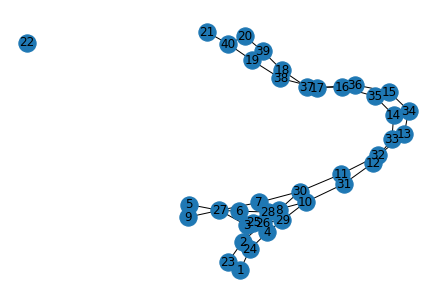

In [274]:
G = nnet1.nrn_tls.netGraph
pos = nx.spring_layout(nnet1.nrn_tls.netGraph, seed=15) 
# print(nx.rescale_layout_dict(pos))
nx.draw(nnet1.nrn_tls.netGraph, with_labels=True, pos=pos)

In [341]:
new_g = nx.blockmodel(G,[28])

AttributeError: module networkx has no attribute blockmodel

In [340]:
l = nx.degree_centrality(G)

In [233]:
nnet1.show_neurons_by_width(3)

74 : [0.0, 1.0, 2.0, 11.0, 12.0] {'_id': 74, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [0.0, 1.0, 2.0, 11.0, 12.0], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 19, 'y': 6}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 3, 'local_tip_1': {'x': 0, 'y': 0}, 'vector_1': {'x': 0, 'y': 0}, 'local_tip_2': {'x': 0, 'y': 0}, 'vector_2': {'x': 0, 'y': 0}, 'axes_symétrie': [], 'angle': -0.7853981633974483, 'std_angle': -1, 'length_c': 0}}
75 : [0.0, 1.0, 2.0, 13.0] {'_id': 75, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [0.0, 1.0, 2.0, 13.0], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 20, 'y': 6}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 3, 'local_tip_1': {'x': 0, 'y': 0}, 'vector_1': {'x': 0, 'y': 0}, 'local_tip_2': {'x': 0, 'y': 0}, 'vector_2': {'x': 0, 'y': 0}, 'axes_symétrie': [], 'angle': -2.356194490192345, 'std_angle': -1, 'le

7 pixels
{'_id': 670, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [453, 364, 400, 407, 414], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 19, 'y': 10}, 'real_center': {'x': 18.9, 'y': 10.2}, 'matrix_width': 7, 'local_tip_1': {'x': 19.0, 'y': 6.0}, 'vector_1': {'x': 0.0, 'y': 1.0}, 'local_tip_2': {'x': 19.0, 'y': 14.0}, 'vector_2': {'x': -0.0, 'y': -1.0}, 'axes_symétrie': [], 'angle': 0.09272952180016122, 'std_angle': -1, 'length_c': 8.0, 'field_list': [135, 199, 175, 148, 153, 157, 94]}}


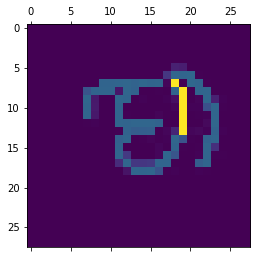

In [214]:
nnet1.show_neuron_receptive_field(670,4, True) 

In [236]:
nnet1.show_neuron_receptive_field(80,0, True) 

TypeError: 'NoneType' object is not subscriptable

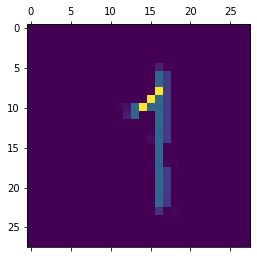

In [110]:
nnet1.show_neuron_receptive_field(59,0)

In [278]:
nnet1.nrn_tls.get_neuron_from_id(24)

{'_id': 24,
 'schema_version': 2,
 'type': 'sentive_vision_arcs',
 'DbConnectivity': {'pre_synaptique': [0.0, 1.0, 2.0, 3.0, 4.0],
  'post_synaptique': []},
 'meta': {'mode': 'croissance',
  'center': {'x': 16, 'y': 8},
  'real_center': {'x': 0.0, 'y': 0.0},
  'matrix_width': 3,
  'local_tip_1': {'x': 0, 'y': 0},
  'vector_1': {'x': 0.0, 'y': 2.0},
  'local_tip_2': {'x': 0, 'y': 0},
  'vector_2': {'x': 0, 'y': 0},
  'axes_symétrie': [],
  'angle': 0.0,
  'std_angle': -1,
  'length_c': 0}}

In [252]:
nnet1.nrn_tls.get_neuron_from_id(25)

{'_id': 25,
 'schema_version': 2,
 'type': 'sentive_vision_arcs',
 'DbConnectivity': {'pre_synaptique': [0.0, 2.0, 3.0, 4.0, 6.0, 8.0],
  'post_synaptique': []},
 'meta': {'mode': 'croissance',
  'center': {'x': 15, 'y': 9},
  'real_center': {'x': 0.0, 'y': 0.0},
  'matrix_width': 3,
  'local_tip_1': {'x': 0, 'y': 0},
  'vector_1': {'x': 1.5, 'y': -0.75},
  'local_tip_2': {'x': 0, 'y': 0},
  'vector_2': {'x': 0, 'y': 0},
  'axes_symétrie': [],
  'angle': 1.3744467859455345,
  'std_angle': -1,
  'length_c': 0}}

{'_id': 60, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [26, 34, 25], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 15, 'y': 9}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 5, 'local_tip_1': {'x': 13.0, 'y': 11.0}, 'vector_1': {'x': 2.0, 'y': -2.0}, 'local_tip_2': {'x': 16.0, 'y': 7.0}, 'vector_2': {'x': 1.0, 'y': -2.0}, 'axes_symétrie': [], 'angle': -0.3217505543966423, 'std_angle': -1, 'length_c': 0}}


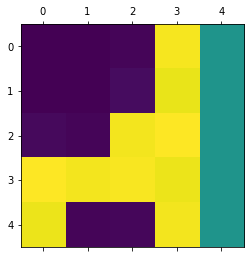

In [96]:
nnet1.show_receptive_field_id(60)

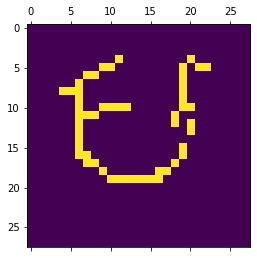

In [27]:
np_stamp = np.zeros([28,28])
## 342
vector = {
    "x": -1,
    "y": -0
}
angle =  -0.23182380450040305
start = {
    "x": 12,
    "y": 10
}
iteration = 6
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 351
vector = {
    "x": 1,
    "y": -1
}
angle =  -0.3425386762798121
start = {
    "x": 17,
    "y": 18
}
iteration = 6
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 326
vector = {
    "x": 1,
    "y": -0.5
}
angle =  1.1165750269694528
start = {
    "x": 19,
    "y": 5
}
iteration = 3
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 323
vector = {
    "x": 1,
    "y": -0.5
}
angle =  -0.0029197200688167533
start = {
    "x": 4,
    "y": 8
}
iteration = 7
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 336
vector = {
    "x": 0,
    "y": 1
}
angle =  0.08429956527287384
start = {
    "x": 19,
    "y": 5
}
iteration = 7
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 352
vector = {
    "x": 0,
    "y": 1
}
angle =  -0.29475261075542974
start = {
    "x": 6,
    "y": 12
}
iteration = 17
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 338
vector = {
    "x": 0,
    "y": -1
}
angle =  0.01892650072057606
start = {
    "x": 6,
    "y": 16
}
iteration = 8
plt.matshow(toto.nrn_drwr(np_stamp,vector,angle,iteration, start))

{'_id': 321, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [186, 185, 176], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 16, 'y': 20}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 5, 'local_tip_1': {'x': 14.0, 'y': 20.0}, 'vector_1': {'x': 2.0, 'y': 0.0}, 'local_tip_2': {'x': 18.0, 'y': 18.0}, 'vector_2': {'x': 2.0, 'y': -2.0}, 'axes_symétrie': [], 'angle': -0.7853981633974484, 'std_angle': -1, 'length_c': 0}}


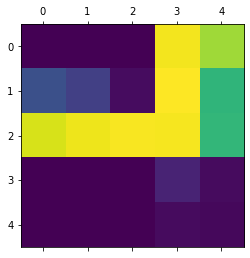

In [29]:
show_receptive_field_id(321,episd_id)

In [30]:
A = [23, 22, 29, 29, 23, 41, 41, 29, 43, 43, 41, 44, 44, 43, 45, 45, 44, 46, 46, 45, 47, 47, 46, 48, 48, 47, 49, 49, 48, 50, 50, 49, 51, 51, 50, 52, 52, 51, 53, 43, 40, 44, 42, 39, 44, 44, 42, 45, 42, 38, 44, 40, 28, 43, 38, 30, 42, 30, 23, 38, 28, 24, 40, 24, 22, 28, 23, 22, 30]
np.histogram(A,list(set(A)))

(array([3, 4, 2, 3, 3, 3, 3, 1, 3, 3, 4, 5, 7, 4, 3, 3, 3, 3, 3, 3, 3]),
 array([22, 23, 24, 28, 29, 30, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53]))

{'_id': 501, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [199, 175, 206], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 19, 'y': 13}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 5, 'local_tip_1': {'x': 18.0, 'y': 15.0}, 'vector_1': {'x': 1.0, 'y': -2.0}, 'local_tip_2': {'x': 19.0, 'y': 11.0}, 'vector_2': {'x': 0.0, 'y': -2.0}, 'axes_symétrie': [], 'angle': -0.46364760900080615, 'std_angle': -1, 'length_c': 0}}


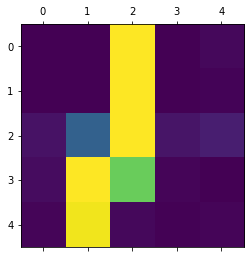

In [383]:
nnet1.show_receptive_field_id(501)

In [374]:
nnet1.nrn_tls.lst_nrns[500].neuron

{'_id': 501,
 'schema_version': 2,
 'type': 'sentive_vision_arcs',
 'DbConnectivity': {'pre_synaptique': [199, 175, 206], 'post_synaptique': []},
 'meta': {'mode': 'croissance',
  'center': {'x': 19, 'y': 13},
  'real_center': {'x': 0.0, 'y': 0.0},
  'matrix_width': 5,
  'local_tip_1': {'x': 18.0, 'y': 15.0},
  'vector_1': {'x': 1.0, 'y': -2.0},
  'local_tip_2': {'x': 19.0, 'y': 11.0},
  'vector_2': {'x': 0.0, 'y': -2.0},
  'axes_symétrie': [],
  'angle': -0.46364760900080615,
  'std_angle': -1,
  'length_c': 0}}

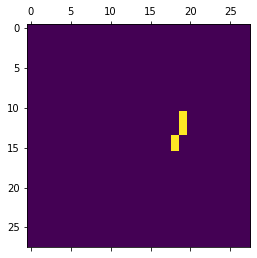

In [390]:

np_stamp = np.zeros([28,28])
vector = {
    "x": 0.5,
    "y": -1
}
angle =  -0.46364760900080615/2
start = {
    "x": 18,
    "y": 15
}
iteration = 4
plt.matshow(nnet1.nrn_tls.nrn_drwr(np_stamp,vector,angle,iteration, start))

In [15]:
nnet1.nrn_tls.lst_nrns[50].neuron["meta"]["local_tip_1"]

{'x': 1.0, 'y': 0}

In [58]:
A=set()

In [63]:
A.add(5)

In [67]:
A.pop()

4

In [68]:
A

{5}